In [1]:
!pip install boario pymrio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 79.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 37.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 25.5 MB/s eta 0:00:00
  Created wheel for p

In [3]:
# import pymrio for the test MRIO
import pymrio

# import pandas for the plot
import pandas as pd

# import the different classes
from boario.simulation import Simulation  # Simulation wraps the model
from boario.extended_models import ARIOPsiModel  # The core of the model
from boario.event import EventKapitalRebuild  # A class defining a shock on capital

1. Construct MRIO tables -> populated IOSystem

In [11]:
# https://spjuhel.github.io/BoARIO/index.html
# https://pymrio.readthedocs.io/en/latest/index.html

    pymrio.IOSystem
    
    Attributes
    ----------
    Z : pandas.DataFrame
        Symetric input output table (flows) with country and sectors as
        MultiIndex with names 'region' and 'sector' for columns and index
    Y : pandas.DataFrame
        final demand with MultiIndex with index.names = (['region', 'sector'])
        and column.names = (['region', 'category'])
    A : pandas.DataFrame
        coefficient input output table, MultiIndex as Z
    L : pandas.DataFrame
        Leontief (= inv(I-A)), MultiIndex as Z
    unit : pandas.DataFrame
        Unit for each row of Z
    system : string
        Note for the IOSystem, recommended to be 'pxp' or 'ixi' for
        product by product or industry by industry.
        However, this can be any string and can have more information if needed
        (eg for different technoloy assumptions)
        The string will be passed to the IOSystem
    meta : class
        Meta class handler
    version : string, DEPRECATED
        This can be used as a version tracking system.
        Will be removed in future versions - all data in meta
    year : string or int, DEPRECATED
        Baseyear of the IOSystem
        Will be removed in future versions - all data in meta
    price : string, DEPRECATED
        Price system of the IO (current or constant prices)
        Will be removed in future versions - all data in meta
    name : string, optional, DEPRECATED
        Name of the IOSystem, default is 'IO'
        Will be removed in future versions - all data in meta
    population: pandas.DataFrame, optional
        DataFrame with row 'Population' and columns following region names of Z


Processed: Step: 1000 ~ 100% Time:  0:00:05                                    
Processed: Step: 1000 ~ 100% Time:  0:00:05                                    

<AxesSubplot: xlabel='step'>

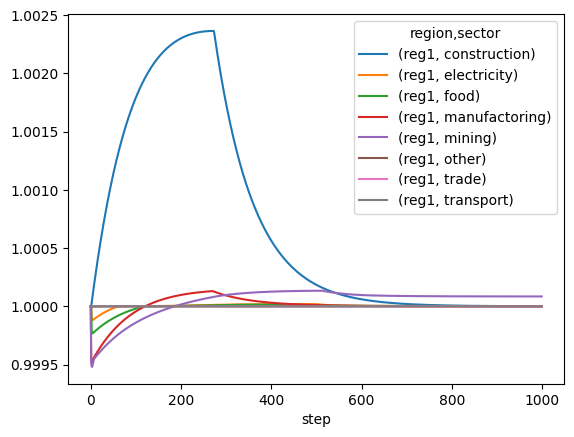

In [13]:
#     pymrio test system contains:
#         - six regions,
#         - seven sectors,
#         - seven final demand categories
#         - two extensions (emissions and factor_inputs)
mrio = pymrio.load_test().calc_all()

# laod_test() generates IOSystem

# Instantiate the model and the simulation
model = ARIOPsiModel(mrio)
sim = Simulation(model,n_temporal_units_to_sim=1000)

# 4 possible types of events
# EventArbitraryProd
# EventKapitalDestroyed
# EventKapitalRebuild
# EventKapitalRecover

ev = EventKapitalRebuild.from_scalar_regions_sectors(
  impact=500000,
  regions=["reg1"],
  sectors=["manufactoring", "mining"],
  impact_sectoral_distrib = "gdp",
  rebuilding_sectors={"construction": 0.55,"manufactoring": 0.45},
  rebuilding_factor=1.0,
  rebuild_tau=90,
)

# Add the event to the simulation
sim.add_event(ev)

# Launch the simulation
sim.loop(progress=True)

# You should be able to generate a dataframe of
# the production with the following line
df = sim.production_realised
# This allows to normalize production at its initial level
df = df / df.loc[0]

df.loc[:, ("reg1", slice(None))].plot()

In [5]:
mrio

In [6]:
df

region         reg1                                                          \
sector construction electricity      food manufactoring    mining     other   
step                                                                          
0          1.000000    1.000000  1.000000      1.000000  1.000000  1.000000   
1          1.000000    1.000000  1.000000      0.999521  0.999521  1.000000   
2          1.000030    0.999904  0.999787      0.999523  0.999482  0.999998   
3          1.000060    0.999883  0.999766      0.999531  0.999480  0.999998   
4          1.000089    0.999881  0.999768      0.999538  0.999495  0.999998   
...             ...         ...       ...           ...       ...       ...   
725        1.000015    1.000003  1.000003      1.000001  1.000088  1.000000   
726        1.000015    1.000003  1.000003      1.000001  1.000088  1.000000   
727        1.000015    1.000003  1.000003      1.000001  1.000087  1.000000   
728        1.000015    1.000003  1.000003      1.000001  1.000087  1.000000   
729        1.000014    1.000003  1.000003      1.000001  1.000087  1.000000   

region                             reg2              ...  reg5            \
sector     trade transport construction electricity  ... trade transport   
step                                                 ...                   
0       1.000000  1.000000     1.000000         1.0  ...   1.0       1.0   
1       1.000000  1.000000     1.000000         1.0  ...   1.0       1.0   
2       0.999999  0.999999     1.000000         1.0  ...   1.0       1.0   
3       0.999999  0.999999     1.000000         1.0  ...   1.0       1.0   
4       0.999999  0.999999     1.000001         1.0  ...   1.0       1.0   
...          ...       ...          ...         ...  ...   ...       ...   
725     1.000000  1.000000     1.000000         1.0  ...   1.0       1.0   
726     1.000000  1.000000     1.000000         1.0  ...   1.0       1.0   
727     1.000000  1.000000     1.000000         1.0  ...   1.0       1.0   
728     1.000000  1.000000     1.000000         1.0  ...   1.0       1.0   
729     1.000000  1.000000     1.000000         1.0  ...   1.0       1.0   

region         reg6                                                       \
sector construction electricity food manufactoring    mining other trade   
step                                                                       
0          1.000000    1.000000  1.0           1.0  1.000000   1.0   1.0   
1          1.000000    1.000000  1.0           1.0  1.000000   1.0   1.0   
2          1.000001    1.000000  1.0           1.0  0.999983   1.0   1.0   
3          1.000002    0.999999  1.0           1.0  0.999979   1.0   1.0   
4          1.000004    0.999999  1.0           1.0  0.999979   1.0   1.0   
...             ...         ...  ...           ...       ...   ...   ...   
725        1.000000    1.000000  1.0           1.0  1.000003   1.0   1.0   
726        1.000000    1.000000  1.0           1.0  1.000003   1.0   1.0   
727        1.000000    1.000000  1.0           1.0  1.000003   1.0   1.0   
728        1.000000    1.000000  1.0           1.0  1.000003   1.0   1.0   
729        1.000000    1.000000  1.0           1.0  1.000003   1.0   1.0   

region            
sector transport  
step              
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
...          ...  
725          1.0  
726          1.0  
727          1.0  
728          1.0  
729          1.0  

[730 rows x 48 columns]

In [17]:
dir(mrio)

['A',
 'L',
 'Y',
 'Z',
 '__basic__',
 '__class__',
 '__coefficients__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__non_agg_attributes__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'aggregate',
 'aggregate_duplicates',
 'calc_all',
 'calc_extensions',
 'calc_system',
 'copy',
 'emissions',
 'factor_inputs',
 'get_DataFrame',
 'get_Y_categories',
 'get_extensions',
 'get_gross_trade',
 'get_index',
 'get_regions',
 'get_sectors',
 'meta',
 'name',
 'population',
 'remove_extension',
 'rename_Y_categories',
 'rename_regions',
 'rename_sectors',
 'report_accounts',
 'reset_all_full',
 'reset_all_to_coefficients',
 'reset_all_to_flows',
 'reset_extensions',
 'reset_full',
 'reset_to_coefficients',
 'reset_to_flows',
 '

In [40]:
mrio.Z.to_csv("mrio-table.csv")

In [20]:
mrio.Y

region                                 reg1                              \
category             Changes in inventories Changes in valuables Export   
region sector                                                             
reg1   construction            2.468631e+03         0.000000e+00      0   
       electricity             3.953313e+02         3.664366e-03      0   
       food                    7.284143e+03         0.000000e+00      0   
       manufactoring           1.869527e+03         1.048796e+03      0   
       mining                  2.744529e+02         3.760902e-04      0   
       other                   1.839343e+03         5.227079e+02      0   
       trade                   1.230218e+03         2.162111e+02      0   
       transport               2.549799e+02         1.491964e+01      0   
reg2   construction            5.289036e+00         0.000000e+00      0   
       electricity             6.692632e-02         3.295038e-03      0   
       food                    2.437177e+02         0.000000e+00      0   
       manufactoring           4.415752e+03         1.637658e+02      0   
       mining                  2.910648e+01         3.970468e-05      0   
       other                   3.441835e+01         8.185969e+00      0   
       trade                   3.560716e+01         3.192694e+00      0   
       transport               1.824452e+01         1.130845e+00      0   
reg3   construction            1.497786e+00         0.000000e+00      0   
       electricity             6.123697e-03         0.000000e+00      0   
       food                    7.506283e+01         1.591042e-05      0   
       manufactoring           2.505180e+03         3.452855e+01      0   
       mining                  6.197915e+01         0.000000e+00      0   
       other                   4.357460e+01         1.282245e+01      0   
       trade                   2.339112e+01         4.547103e-04      0   
       transport               4.797089e+00         2.008182e-01      0   
reg4   construction            1.529848e-01         0.000000e+00      0   
       electricity             2.567839e-04         0.000000e+00      0   
       food                    9.139938e+01         0.000000e+00      0   
       manufactoring           2.263532e+06         4.696135e+01      0   
       mining                  2.697312e+01         3.112643e-09      0   
       other                   1.370464e+01         3.057483e+00      0   
       trade                   2.016171e-03         1.439760e-04      0   
       transport               1.872829e+00         3.471224e-02      0   
reg5   construction            3.499291e+00         0.000000e+00      0   
       electricity             1.054368e-02         1.354228e-04      0   
       food                    1.581652e+02         0.000000e+00      0   
       manufactoring           9.487795e+02         2.305764e+01      0   
       mining                  1.404009e+02         0.000000e+00      0   
       other                   5.919131e+00         1.619057e+00      0   
       trade                   6.675656e+00         5.240153e-01      0   
       transport               6.961791e+00         5.382994e-01      0   
reg6   construction            3.068701e+00         0.000000e+00      0   
       electricity             6.718069e-02         7.693683e-04      0   
       food                    4.344217e+02         4.761402e-04      0   
       manufactoring           2.280236e+03         5.267666e+01      0   
       mining                  1.757613e+03         2.857093e-04      0   
       other                   4.409483e+00         7.159815e+00      0   
       trade                   1.626705e+01         1.488818e+00      0   
       transport               7.112937e+00         5.664242e-01      0   

region                                                            \
category             Final consumption expenditure by government   
region sector                         

In [21]:
mrio.A

region                        reg1                                          \
sector                construction electricity          food manufactoring   
region sector                                                                
reg1   construction   7.222863e-03    0.021137  5.166017e-03  5.712921e-05   
       electricity    1.824982e-04    0.195823  1.688942e-02  2.350696e-04   
       food           9.568271e-06    0.000617  9.908754e-02  4.035049e-04   
       manufactoring  8.379529e-03    0.065112  1.653335e-01  4.295889e-03   
       mining         3.157815e-04    0.019276  1.075386e-03  7.084738e-05   
       other          4.323215e-03    0.106548  8.052643e-02  1.524854e-03   
       trade          2.256339e-03    0.024820  6.579391e-02  1.017748e-03   
       transport      5.748170e-04    0.022604  1.368570e-02  4.512535e-04   
reg2   construction   7.952820e-06    0.000042  1.005816e-05  2.161696e-07   
       electricity    1.143212e-06    0.001384  1.332482e-04  3.799584e-06   
       food           9.093095e-06    0.000567  3.658218e-03  9.876004e-06   
       manufactoring  5.770446e-04    0.009453  1.762843e-02  5.265848e-04   
       mining         3.585527e-06    0.001898  3.252255e-04  1.240252e-05   
       other          6.909273e-05    0.002760  1.281674e-03  3.752794e-05   
       trade          4.043970e-05    0.001345  2.137980e-03  3.176859e-05   
       transport      2.845907e-05    0.001580  9.593032e-04  3.798508e-05   
reg3   construction   5.029658e-07    0.000003  7.302035e-07  2.128491e-08   
       electricity    1.681861e-07    0.000319  1.145580e-05  1.971001e-07   
       food           5.961643e-07    0.000039  8.583925e-04  5.986173e-06   
       manufactoring  2.245637e-04    0.004439  9.564984e-03  3.360474e-04   
       mining         8.779476e-07    0.000283  1.882473e-04  3.430336e-05   
       other          1.069579e-04    0.003924  1.688060e-03  4.622669e-05   
       trade          4.346797e-06    0.000071  6.958367e-05  1.147182e-06   
       transport      1.323327e-05    0.001137  3.424128e-04  1.929964e-05   
reg4   construction   5.249961e-06    0.000029  8.167537e-06  1.358256e-07   
       electricity    3.080926e-06    0.000188  7.013711e-05  5.447846e-07   
       food           2.141953e-07    0.000049  9.363257e-05  6.937076e-06   
       manufactoring  2.209486e-04    0.004026  5.388671e-03  2.724665e-04   
       mining         8.754115e-07    0.001703  4.857825e-04  5.681703e-06   
       other          2.016225e-05    0.000765  5.498103e-04  1.811325e-05   
       trade          2.996845e-07    0.000006  1.616852e-06  1.139898e-07   
       transport      5.440597e-06    0.000128  1.466274e-04  5.150261e-06   
reg5   construction   8.090494e-06    0.000096  1.132238e-05  2.662600e-07   
       electricity    3.592703e-06    0.001783  2.355202e-04  4.483698e-06   
       food           4.726366e-06    0.000316  3.130944e-03  9.561567e-06   
       manufactoring  1.525430e-04    0.002732  1.137139e-02  1.971724e-04   
       mining         4.277863e-06    0.007388  5.513904e-04  8.603778e-05   
       other          1.347959e-05    0.000623  2.005940e-04  1.017160e-05   
       trade          6.661257e-06    0.000122  1.284587e-04  2.928133e-06   
       transport      1.006356e-05    0.000750  3.327663e-04  1.320962e-05   
reg6   construction   7.045710e-06    0.000042  9.199204e-06  1.825984e-07   
       electricity    5.364635e-07    0.000483  5.559693e-05  9.020135e-07   
       food           1.180863e-05    0.000817  5.969065e-03  1.670517e-05   
       manufactoring  2.120576e-04    0.007499  1.340297e-02  2.780544e-04   
       mining         2.479503e-05    0.059838  9.411313e-04  2.298467e-04   
       other          9.957144e-06    0.000358  2.091710e-04  4.695684e-06   
       trade          9.663658e-06    0.000163  2.213120e-04  4.100247e-06   
       transport      1.013030e-05    0.000796  4.423072e-04  1.694389e-05   

region               

In [22]:
mrio.L

region                    reg1                                      \
sector                    food    mining manufactoring electricity   
region sector                                                        
reg1   food           1.110102  0.001483  4.504076e-04    0.000939   
       mining         0.001749  1.051476  8.160525e-05    0.025239   
       manufactoring  0.186459  0.135405  1.004427e+00    0.085600   
       electricity    0.023518  0.049826  3.080889e-04    1.244839   
       construction   0.006417  0.019542  6.987240e-05    0.027094   
       trade          0.074036  0.038952  1.065424e-03    0.032242   
       transport      0.016159  0.065152  4.779454e-04    0.030626   
       other          0.093528  0.103843  1.628935e-03    0.136905   
reg2   food           0.004084  0.000128  1.189458e-05    0.000720   
       mining         0.000433  0.000685  1.400399e-05    0.002518   
       manufactoring  0.020035  0.016045  5.443276e-04    0.012617   
       electricity    0.000208  0.000561  5.156138e-06    0.001867   
       construction   0.000018  0.000064  4.100497e-07    0.000077   
       trade          0.002451  0.000931  3.443731e-05    0.001830   
       transport      0.001158  0.003431  4.091536e-05    0.002298   
       other          0.001577  0.001918  4.140762e-05    0.003747   
reg3   food           0.000967  0.000049  6.661648e-06    0.000056   
       mining         0.000231  0.000451  3.490846e-05    0.000434   
       manufactoring  0.010949  0.008643  3.483659e-04    0.006142   
       electricity    0.000032  0.000080  6.201651e-07    0.000446   
       construction   0.000011  0.000021  2.820231e-07    0.000038   
       trade          0.000128  0.000240  3.085363e-06    0.000365   
       transport      0.000457  0.002016  2.177843e-05    0.001767   
       other          0.002188  0.002887  5.435341e-05    0.005572   
reg4   food           0.000117  0.000192  7.403940e-06    0.000081   
       mining         0.000629  0.000456  7.355850e-06    0.002321   
       manufactoring  0.006350  0.005944  2.834589e-04    0.005907   
       electricity    0.000118  0.000122  1.178432e-06    0.000358   
       construction   0.000012  0.000025  1.839023e-07    0.000043   
       trade          0.000029  0.000036  7.864666e-07    0.000145   
       transport      0.000193  0.000435  6.336766e-06    0.000401   
       other          0.000687  0.001017  1.989245e-05    0.001178   
reg5   food           0.004034  0.000108  1.308218e-05    0.000472   
       mining         0.000876  0.003915  9.475568e-05    0.009913   
       manufactoring  0.013204  0.005538  2.153640e-04    0.004648   
       electricity    0.000373  0.001203  7.925438e-06    0.002514   
       construction   0.000053  0.000165  2.257267e-06    0.000327   
       trade          0.000406  0.000407  9.263398e-06    0.000808   
       transport      0.000526  0.001462  1.875721e-05    0.001611   
       other          0.000378  0.000716  1.813552e-05    0.001593   
reg6   food           0.006720  0.000220  2.036518e-05    0.001113   
       mining         0.003037  0.012914  2.970791e-04    0.088413   
       manufactoring  0.015409  0.007355  3.060397e-04    0.014277   
       electricity    0.000104  0.000343  3.394139e-06    0.001293   
       construction   0.000019  0.000072  8.531042e-07    0.000244   
       trade          0.000278  0.000302  5.936832e-06    0.000654   
       transport      0.000656  0.003361  3.002892e-05    0.004671   
       other          0.000323  0.000842  1.149883e-05    0.002348   

region                                                                    \
sector                construction         trade     transport     other   
region sector                                                              
reg1   food           1.566148e-05  7.870021e-05  8.141417e-06  0.000073   
       mining         3.399591e-04  7.830041e-06  1.055224e-05  0.000026   
       manufactoring  8.550875e-03  9.356762e-04 

In [35]:
mrio.Z.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48 entries, ('reg1', 'construction') to ('reg6', 'transport')
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (reg1, construction)   48 non-null     float64
 1   (reg1, electricity)    48 non-null     float64
 2   (reg1, food)           48 non-null     float64
 3   (reg1, manufactoring)  48 non-null     float64
 4   (reg1, mining)         48 non-null     float64
 5   (reg1, other)          48 non-null     float64
 6   (reg1, trade)          48 non-null     float64
 7   (reg1, transport)      48 non-null     float64
 8   (reg2, construction)   48 non-null     float64
 9   (reg2, electricity)    48 non-null     float64
 10  (reg2, food)           48 non-null     float64
 11  (reg2, manufactoring)  48 non-null     float64
 12  (reg2, mining)         48 non-null     float64
 13  (reg2, other)          48 non-null     float64
 14  (reg2, trade)     

In [37]:
mrio.Y.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48 entries, ('reg1', 'construction') to ('reg6', 'transport')
Data columns (total 42 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   (reg1, Changes in inventories)                                                                48 non-null     float64
 1   (reg1, Changes in valuables)                                                                  48 non-null     float64
 2   (reg1, Export)                                                                                48 non-null     int64  
 3   (reg1, Final consumption expenditure by government)                                           48 non-null     float64
 4   (reg1, Final consumption expenditure by households)                                           48 non-null     fl

In [38]:
mrio.A.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48 entries, ('reg1', 'construction') to ('reg6', 'transport')
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (reg1, construction)   48 non-null     float64
 1   (reg1, electricity)    48 non-null     float64
 2   (reg1, food)           48 non-null     float64
 3   (reg1, manufactoring)  48 non-null     float64
 4   (reg1, mining)         48 non-null     float64
 5   (reg1, other)          48 non-null     float64
 6   (reg1, trade)          48 non-null     float64
 7   (reg1, transport)      48 non-null     float64
 8   (reg2, construction)   48 non-null     float64
 9   (reg2, electricity)    48 non-null     float64
 10  (reg2, food)           48 non-null     float64
 11  (reg2, manufactoring)  48 non-null     float64
 12  (reg2, mining)         48 non-null     float64
 13  (reg2, other)          48 non-null     float64
 14  (reg2, trade)     

In [39]:
mrio.L.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48 entries, ('reg1', 'food') to ('reg6', 'other')
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (reg1, food)           48 non-null     float64
 1   (reg1, mining)         48 non-null     float64
 2   (reg1, manufactoring)  48 non-null     float64
 3   (reg1, electricity)    48 non-null     float64
 4   (reg1, construction)   48 non-null     float64
 5   (reg1, trade)          48 non-null     float64
 6   (reg1, transport)      48 non-null     float64
 7   (reg1, other)          48 non-null     float64
 8   (reg2, food)           48 non-null     float64
 9   (reg2, mining)         48 non-null     float64
 10  (reg2, manufactoring)  48 non-null     float64
 11  (reg2, electricity)    48 non-null     float64
 12  (reg2, construction)   48 non-null     float64
 13  (reg2, trade)          48 non-null     float64
 14  (reg2, transport)      48 non-

In [46]:
mrio.Z

region                         reg1                                            \
sector                 construction   electricity          food manufactoring   
region sector                                                                   
reg1   construction   173724.370000   6711.257700   1235.475700  1.507725e+04   
       electricity      4389.448300  62177.762000   4039.179300  6.203838e+04   
       food              230.136140    195.903190  23697.221000  1.064910e+05   
       manufactoring  201544.510000  20674.380000  39540.225000  1.133749e+06   
       mining           7595.179900   6120.415900    257.183170  1.869768e+04   
       other          103982.010000  33830.992000  19258.250000  4.024319e+05   
       trade           54269.483000   7880.960000  15734.902000  2.685988e+05   
       transport       13825.505000   7177.094100   3272.995500  1.190926e+05   
reg2   construction      191.281310     13.479970      2.405453  5.705039e+01   
       electricity        27.496548    439.473170     31.866890  1.002767e+03   
       food              218.707210    179.919920    874.878840  2.606425e+03   
       manufactoring   13879.082000   3001.625400   4215.916900  1.389736e+05   
       mining             86.239127    602.649080     77.779107  3.273212e+03   
       other            1661.818900    876.346750    306.517860  9.904184e+03   
       trade             972.656020    427.209040    511.307270  8.384205e+03   
       transport         684.497840    501.699820    229.421580  1.002483e+04   
reg3   construction       12.097337      0.987363      0.174631  5.617406e+00   
       electricity         4.045214    101.211960      2.739705  5.201766e+01   
       food               14.338950     12.264721    205.288330  1.579841e+03   
       manufactoring    5401.207600   1409.618800   2287.507900  8.868794e+04   
       mining             21.116403     89.964139     45.020157  9.053170e+03   
       other            2572.551900   1245.900200    403.706930  1.219992e+04   
       trade             104.549210     22.662276     16.641239  3.027585e+02   
       transport         318.286730    361.045010     81.889516  5.093464e+03   
reg4   construction      126.272120      9.051426      1.953302  3.584640e+01   
       electricity        74.102453     59.733285     16.773598  1.437768e+02   
       food                5.151827     15.633945     22.392639  1.830798e+03   
       manufactoring    5314.258800   1278.411900   1288.724200  7.190799e+04   
       mining             21.055405    540.792690    116.177020  1.499486e+03   
       other             484.942710    242.932220    131.489540  4.780356e+03   
       trade               7.208014      1.795252      0.386677  3.008362e+01   
       transport         130.857300     40.615357     35.066587  1.359231e+03   
reg5   construction      194.592640     30.341507      2.707798  7.027000e+01   
       electricity        86.411727    566.265350     56.325696  1.183315e+03   
       food              113.678590    100.411140    748.779090  2.523440e+03   
       manufactoring    3668.965600    867.386940   2719.517100  5.203675e+04   
       mining            102.891210   2345.963000    131.867430  2.270666e+04   
       other             324.211310    197.878620     47.972935  2.684437e+03   
       trade             160.216610     38.649242     30.721461  7.727781e+02   
       transport         242.048770    238.248970     79.582514  3.486216e+03   
reg6   construction      169.463490     13.324687      2.200030  4.819044e+01   
       electricity        12.903025    153.212170     13.296250  2.380548e+02   
       food              284.021220    259.289860   1427.528100  4.408745e+03   
       manufactoring    5100.412400   2381.148500   3205.378500  7.338272e+04   
       mining            596.370220  18999.843000    225.075690  6.065999e+04   
       other             239.489330    113.752330     50.024168  1.239261e+03   
       trade             232.43

In [45]:
mrio.Z.reset_index()

region region         sector           reg1                              \
sector                         construction   electricity          food   
0        reg1   construction  173724.370000   6711.257700   1235.475700   
1        reg1    electricity    4389.448300  62177.762000   4039.179300   
2        reg1           food     230.136140    195.903190  23697.221000   
3        reg1  manufactoring  201544.510000  20674.380000  39540.225000   
4        reg1         mining    7595.179900   6120.415900    257.183170   
5        reg1          other  103982.010000  33830.992000  19258.250000   
6        reg1          trade   54269.483000   7880.960000  15734.902000   
7        reg1      transport   13825.505000   7177.094100   3272.995500   
8        reg2   construction     191.281310     13.479970      2.405453   
9        reg2    electricity      27.496548    439.473170     31.866890   
10       reg2           food     218.707210    179.919920    874.878840   
11       reg2  manufactoring   13879.082000   3001.625400   4215.916900   
12       reg2         mining      86.239127    602.649080     77.779107   
13       reg2          other    1661.818900    876.346750    306.517860   
14       reg2          trade     972.656020    427.209040    511.307270   
15       reg2      transport     684.497840    501.699820    229.421580   
16       reg3   construction      12.097337      0.987363      0.174631   
17       reg3    electricity       4.045214    101.211960      2.739705   
18       reg3           food      14.338950     12.264721    205.288330   
19       reg3  manufactoring    5401.207600   1409.618800   2287.507900   
20       reg3         mining      21.116403     89.964139     45.020157   
21       reg3          other    2572.551900   1245.900200    403.706930   
22       reg3          trade     104.549210     22.662276     16.641239   
23       reg3      transport     318.286730    361.045010     81.889516   
24       reg4   construction     126.272120      9.051426      1.953302   
25       reg4    electricity      74.102453     59.733285     16.773598   
26       reg4           food       5.151827     15.633945     22.392639   
27       reg4  manufactoring    5314.258800   1278.411900   1288.724200   
28       reg4         mining      21.055405    540.792690    116.177020   
29       reg4          other     484.942710    242.932220    131.489540   
30       reg4          trade       7.208014      1.795252      0.386677   
31       reg4      transport     130.857300     40.615357     35.066587   
32       reg5   construction     194.592640     30.341507      2.707798   
33       reg5    electricity      86.411727    566.265350     56.325696   
34       reg5           food     113.678590    100.411140    748.779090   
35       reg5  manufactoring    3668.965600    867.386940   2719.517100   
36       reg5         mining     102.891210   2345.963000    131.867430   
37       reg5          other     324.211310    197.878620     47.972935   
38       reg5          trade     160.216610     38.649242     30.721461   
39       reg5      transport     242.048770    238.248970     79.582514   
40       reg6   construction     169.463490     13.324687      2.200030   
41       reg6    electricity      12.903025    153.212170     13.296250   
42       reg6           food     284.021220    259.289860   1427.528100   
43       reg6  manufactoring    5100.412400   2381.148500   3205.378500   
44       reg6         mining     596.370220  18999.843000    225.075690   
45       reg6          other     239.489330    113.752330     50.024168   
46       reg6          trade     232.430400     51.908459     52.927724   
47       reg6      transport     243.654010    252.706500    105.779700   

region                                                                         \
sector manufactoring       mining         other          trade      transport   
0       1.507725e+04   844.585880  9.248919e+04   10717.539000   11183.202000   
1     

In [49]:
pd.read_csv("mrio-table.csv")

,region,Unnamed: 1,reg1,reg1.1,reg1.2,reg1.3,reg1.4,reg1.5,reg1.6,reg1.7,...,reg5.6,reg5.7,reg6,reg6.1,reg6.2,reg6.3,reg6.4,reg6.5,reg6.6,reg6.7
0,sector,NaN,construction,electricity,food,manufactoring,mining,other,trade,transport,...,trade,transport,construction,electricity,food,manufactoring,mining,other,trade,transport
1,region,sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,reg1,construction,173724.37,6711.2577,1235.4757,15077.254,844.58588,92489.19,10717.539,11183.202,...,5.6005663,9.8945827,8.6449341,0.55530737,0.31642503,5.9846072,0.91224815,7.5211555,0.51006739,2.4738748
3,reg1,electricity,4389.4483,62177.762,4039.1793,62038.378,1852.159,40471.331,20077.943,9312.1118,...,102.88238,72.020718,6.52905,21.019857,15.612389,409.41058,10.614954,71.693223,53.969911,28.71809
4,reg1,food,230.13614,195.90319,23697.221,106490.98,57.495387,6231.6826,11194.553,315.50525,...,22.272636,0.47557969,145.35215,3.9430833,2897.532,1093.8179,17.686944,53.882153,47.742124,4.9807845
5,reg1,manufactoring,201544.51,20674.38,39540.225,1133749.4,6063.071,182796.81,143663.74,65917.811,...,4206.2405,3702.8114,4230.6363,1322.6207,1099.8313,85603.679,2491.9001,6725.1495,2279.7469,2561.7218
6,reg1,mining,7595.1799,6120.4159,257.18317,18697.682,2341.1565,1382.5566,661.99742,257.65744,...,1.5408065,0.90744404,31.782763,435.2733,1.2175293,249.69974,105.07033,8.0415603,8.6190022,1.8760061
7,reg1,other,103982.01,33830.992,19258.25,402431.89,4488.0629,1021037.1,275773.06,114951.67,...,601.77818,310.86706,521.77658,240.25391,171.83029,1858.0126,392.40333,2966.5513,1192.3114,639.33858
8,reg1,trade,54269.483,7880.96,15734.902,268598.81,1727.2548,93377.098,80768.016,35457.335,...,1382.5676,1292.0717,1643.2123,215.20203,1530.1897,9191.7908,665.55164,1588.8583,2015.834,1725.9316
9,reg1,transport,13825.505,7177.0941,3272.9955,119092.55,2940.896,101484.09,105903.79,207849.08,...,475.824,1237.8326,558.59562,507.90748,1317.8221,9949.4227,7825.311,1259.5525,1635.7424,11998.647


In [43]:
pd.read_csv("mrio-table.csv", index_col=["region", "sector"])

ValueError: Index sector invalid

In [69]:
mrio.Z

region                         reg1                                            \
sector                 construction   electricity          food manufactoring   
region sector                                                                   
reg1   construction   173724.370000   6711.257700   1235.475700  1.507725e+04   
       electricity      4389.448300  62177.762000   4039.179300  6.203838e+04   
       food              230.136140    195.903190  23697.221000  1.064910e+05   
       manufactoring  201544.510000  20674.380000  39540.225000  1.133749e+06   
       mining           7595.179900   6120.415900    257.183170  1.869768e+04   
       other          103982.010000  33830.992000  19258.250000  4.024319e+05   
       trade           54269.483000   7880.960000  15734.902000  2.685988e+05   
       transport       13825.505000   7177.094100   3272.995500  1.190926e+05   
reg2   construction      191.281310     13.479970      2.405453  5.705039e+01   
       electricity        27.496548    439.473170     31.866890  1.002767e+03   
       food              218.707210    179.919920    874.878840  2.606425e+03   
       manufactoring   13879.082000   3001.625400   4215.916900  1.389736e+05   
       mining             86.239127    602.649080     77.779107  3.273212e+03   
       other            1661.818900    876.346750    306.517860  9.904184e+03   
       trade             972.656020    427.209040    511.307270  8.384205e+03   
       transport         684.497840    501.699820    229.421580  1.002483e+04   
reg3   construction       12.097337      0.987363      0.174631  5.617406e+00   
       electricity         4.045214    101.211960      2.739705  5.201766e+01   
       food               14.338950     12.264721    205.288330  1.579841e+03   
       manufactoring    5401.207600   1409.618800   2287.507900  8.868794e+04   
       mining             21.116403     89.964139     45.020157  9.053170e+03   
       other            2572.551900   1245.900200    403.706930  1.219992e+04   
       trade             104.549210     22.662276     16.641239  3.027585e+02   
       transport         318.286730    361.045010     81.889516  5.093464e+03   
reg4   construction      126.272120      9.051426      1.953302  3.584640e+01   
       electricity        74.102453     59.733285     16.773598  1.437768e+02   
       food                5.151827     15.633945     22.392639  1.830798e+03   
       manufactoring    5314.258800   1278.411900   1288.724200  7.190799e+04   
       mining             21.055405    540.792690    116.177020  1.499486e+03   
       other             484.942710    242.932220    131.489540  4.780356e+03   
       trade               7.208014      1.795252      0.386677  3.008362e+01   
       transport         130.857300     40.615357     35.066587  1.359231e+03   
reg5   construction      194.592640     30.341507      2.707798  7.027000e+01   
       electricity        86.411727    566.265350     56.325696  1.183315e+03   
       food              113.678590    100.411140    748.779090  2.523440e+03   
       manufactoring    3668.965600    867.386940   2719.517100  5.203675e+04   
       mining            102.891210   2345.963000    131.867430  2.270666e+04   
       other             324.211310    197.878620     47.972935  2.684437e+03   
       trade             160.216610     38.649242     30.721461  7.727781e+02   
       transport         242.048770    238.248970     79.582514  3.486216e+03   
reg6   construction      169.463490     13.324687      2.200030  4.819044e+01   
       electricity        12.903025    153.212170     13.296250  2.380548e+02   
       food              284.021220    259.289860   1427.528100  4.408745e+03   
       manufactoring    5100.412400   2381.148500   3205.378500  7.338272e+04   
       mining            596.370220  18999.843000    225.075690  6.065999e+04   
       other             239.489330    113.752330     50.024168  1.239261e+03   
       trade             232.43

In [79]:
test_df = mrio.Z.stack().stack()

In [80]:
test_df.index.names = ["region_row", "sector_row", "region_col", "sector_col"]
# test_df.columns = ["flows"]

In [73]:
test_df.to_csv("mrio-tidy.csv")

In [84]:
test_df

region_row  sector_row    region_col    sector_col
reg1        construction  construction  reg1          173724.370000
                                        reg2             146.036670
                                        reg3              64.421199
                                        reg4               2.606631
                                        reg5               3.366957
                                                          ...      
reg6        transport     transport     reg2            1558.881500
                                        reg3            4284.711600
                                        reg4            1060.250400
                                        reg5             317.890020
                                        reg6          120128.160000
Length: 2304, dtype: float64

In [87]:
test_df["reg1", "construction", "construction", "reg1"] 

173724.37

In [54]:
mrio.Z.index

MultiIndex([('reg1',  'construction'),
            ('reg1',   'electricity'),
            ('reg1',          'food'),
            ('reg1', 'manufactoring'),
            ('reg1',        'mining'),
            ('reg1',         'other'),
            ('reg1',         'trade'),
            ('reg1',     'transport'),
            ('reg2',  'construction'),
            ('reg2',   'electricity'),
            ('reg2',          'food'),
            ('reg2', 'manufactoring'),
            ('reg2',        'mining'),
            ('reg2',         'other'),
            ('reg2',         'trade'),
            ('reg2',     'transport'),
            ('reg3',  'construction'),
            ('reg3',   'electricity'),
            ('reg3',          'food'),
            ('reg3', 'manufactoring'),
            ('reg3',        'mining'),
            ('reg3',         'other'),
            ('reg3',         'trade'),
            ('reg3',     'transport'),
            ('reg4',  'construction'),
            ('reg4',   'e

# Get unique institutions

In [109]:
import os

In [113]:
# Regional SAM Balances IO Detail Accounts
SAM_ACCOUNTS_FILE = "implan-fl/union-county.csv"
FOLDER_PATH = "implan-fl"

In [120]:
counts = []
for filename in os.listdir(FOLDER_PATH):
    file_path = os.path.join(FOLDER_PATH, filename)

    # Check if the current item is a file (not a directory)
    if os.path.isfile(file_path):
        data = pd.read_csv(SAM_ACCOUNTS_FILE, skiprows=1)
        count = len(data[["TypeCodesAll.Description", "InstitutionPayments"]].groupby("TypeCodesAll.Description").agg({"InstitutionPayments": "mean"}))
        counts.append(count)
print("finished")

finished


In [122]:
max(counts), min(counts)

(560, 560)

In [118]:
unique_institutions = data[["TypeCodesAll.Description", "InstitutionPayments"]].groupby("TypeCodesAll.Description").agg({"InstitutionPayments": "mean"}).reset_index()

In [126]:
unique_institutions["InstitutionPayments"] = unique_institutions["InstitutionPayments"].apply(lambda x: int(x))

In [132]:
unique_institutions.to_csv("institutions.csv", index=False)

In [131]:
unique_institutions

,TypeCodesAll.Description,InstitutionPayments
0,"* Employment and payroll of federal govt, mili...",536
1,"* Employment and payroll of federal govt, non-...",535
2,"* Employment and payroll of local govt, education",534
3,"* Employment and payroll of local govt, non-ed...",533
4,"* Employment and payroll of state govt, education",532
...,...,...
555,Wood container and pallet manufacturing,142
556,Wood kitchen cabinet and countertop manufacturing,368
557,Wood office furniture manufacturing,373
558,Wood preservation,135


In [123]:
data

,InstitutionPayments,TypeCodesAll.Description,InstitutionReceipts,TypeCodesAll_1.Description,Value
0,1,Oilseed farming,1,Oilseed farming,8.763162e-08
1,1,Oilseed farming,2,Grain farming,6.073520e-07
2,1,Oilseed farming,3,Vegetable and melon farming,6.433402e-06
3,1,Oilseed farming,4,Fruit farming,9.811744e-06
4,1,Oilseed farming,5,Tree nut farming,8.527622e-07
...,...,...,...,...,...
15798,28001,Domestic Trade,11003,Federal Government Investment,4.921400e-07
15799,28001,Domestic Trade,12001,State/Local Govt NonEducation,1.312973e+01
15800,28001,Domestic Trade,14001,Capital,4.066500e+02
15801,28001,Domestic Trade,14001,Capital,1.070598e-01
